## Simple Linear Regression

#### Build a simple linear regression model by performing EDA and do necessary transformations and select the best model using R or Python.

##  Delivery_time - Predict delivery time using sorting time 

### Importing Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### Importing Data

In [2]:
delivery_data=pd.read_csv('delivery_time.csv')
delivery_data=delivery_data.rename(columns={'Delivery Time':'delivery_time','Sorting Time':'sorting_time'})
delivery_data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### Data Understanding

### Initial Analysis

In [3]:
delivery_data.shape

(21, 2)

In [4]:
delivery_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
delivery_data.isnull().sum()

delivery_time    0
sorting_time     0
dtype: int64

In [6]:
delivery_data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


> By initial analysis, we saw that there is no null values in the data and it is cleaned.

### Assumptions Test

#### 1. Normality

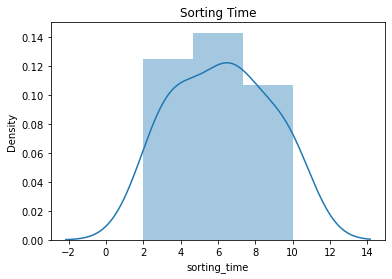

In [7]:
# Plot of Sorting time
sns.distplot(delivery_data['sorting_time'])
plt.title('Sorting Time')
plt.show()

> By seeing the plot we can say that the sorting data is distributed normally.

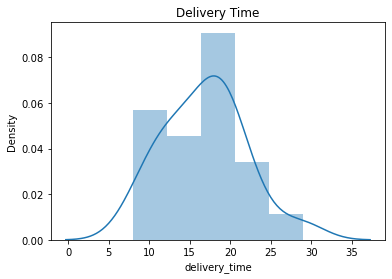

In [8]:
# Plot of Delivery time
sns.distplot(delivery_data['delivery_time'])
plt.title('Delivery Time')
plt.show()

> By seeing the plot we can say that the delivery data is distributed normally.

In [9]:
delivery_data['sorting_time'].skew()

0.047115474210530174

In [10]:
delivery_data['delivery_time'].skew()

0.3523900822831107

> Since the skewnes is in between 0.5 to -0.5, the distribution is approximatly symmetric for both delivery time and sorting time.

In [11]:
delivery_data['sorting_time'].kurtosis()

-1.14845514534878

In [12]:
delivery_data['delivery_time'].kurtosis()

0.31795982942685397

> Since the kurtosis value is less than 3, the data is platykurtic for both delivery time and sorting time.

**Normality test is Passed**

#### 2. Linearity Test

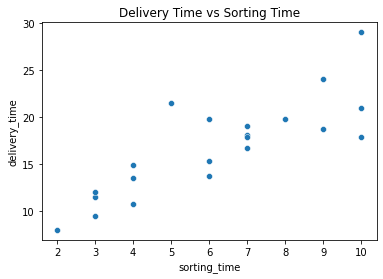

In [13]:
sns.scatterplot(x='sorting_time', y='delivery_time', data= delivery_data)
plt.title('Delivery Time vs Sorting Time')
plt.show()

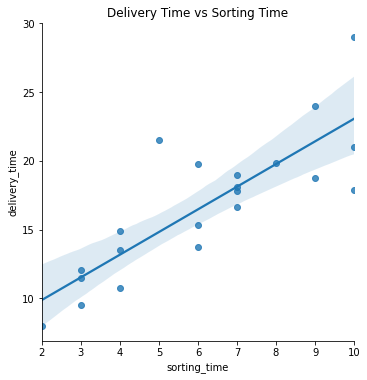

In [14]:
sns.lmplot(x='sorting_time', y='delivery_time', data= delivery_data)
plt.title('Delivery Time vs Sorting Time')
plt.show()

**Linearity test is failed**

#### 3. Multicollinearity Test
We cannot perform here as we are having onlu one input feature.

#### 4. Auto Regression Test

We cannot perform here as we are having only one input feature and that is also not time based feature.

#### 5. Homoscedasticity Test | 6. Zero Residual Mean Test
These 2 Tests can be ony performed post model Training.

### Model Building - Simple Linear Regression

In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [16]:
linear_model = smf.ols(formula = "delivery_time ~ sorting_time",data = delivery_data).fit()

In [17]:
linear_model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [18]:
print('t Values:\n',linear_model.tvalues)
print('----------------------------------')
print('p Values:\n', linear_model.pvalues)

t Values:
 Intercept       3.823349
sorting_time    6.387447
dtype: float64
----------------------------------
p Values:
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [19]:
linear_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        21:52:14   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Testing

**> Manual Testing**

y=intercept+slope*x

If x=10,<br>
y= 6.5827+1.649(10)<br>
y= 23.0727

If x=8,<br>
y= 6.5827+1.649(8)<br>
y= 19.7747

**> Machine Prediction**

In [20]:
test_data=pd.DataFrame(data={'sorting_time':[10,8]})
test_data

,sorting_time
0,10
1,8


In [21]:
linear_model.predict(test_data)

0    23.072933
1    19.774893
dtype: float64

### Model Evaluation

In [22]:
print('r square:',linear_model.rsquared)
print('adjusterd r square',linear_model.rsquared_adj)

r square: 0.6822714748417231
adjusterd r square 0.6655489208860244


**From R-square value, we can say that 68% of the data fit the regression model.**

#### Now let us fit the Normality Plot of the Residuals

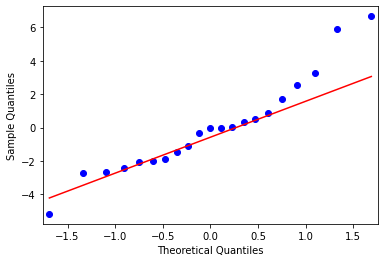

In [23]:
qq_plot=sm.qqplot(linear_model.resid, line='q')
plt.show()

###### -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Now let us transform our explanatory variable by appling log and build the model on it

### Data Preparation

In [24]:
delivery_data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [25]:
delivery_data['log_sorting_time']=delivery_data['sorting_time'].apply(lambda x:np.log(x))

In [26]:
delivery_data.head()

,delivery_time,sorting_time,log_sorting_time
0,21.00,10,2.302585
1,13.50,4,1.386294
2,19.75,6,1.791759
3,24.00,9,2.197225
4,29.00,10,2.302585


### Model Building

In [27]:
import statsmodels.formula.api as smf

In [28]:
transformed_model = smf.ols(formula = "delivery_time ~ log_sorting_time",data = delivery_data).fit()

In [29]:
transformed_model.params

Intercept           1.159684
log_sorting_time    9.043413
dtype: float64

In [30]:
print('t Values:\n',transformed_model.tvalues)
print('----------------------------------')
print('p Values:\n', transformed_model.pvalues)

t Values:
 Intercept           0.472460
log_sorting_time    6.586789
dtype: float64
----------------------------------
p Values:
 Intercept           0.641980
log_sorting_time    0.000003
dtype: float64


In [31]:
transformed_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Tue, 18 Jan 2022   Prob (F-statistic):           2.64e-06
Time:                        21:52:17   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1597      2.455      0.472      0.642      -3.978       6.297
log_sorting_time     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Model Testing

**> Manual Testing**

y=intercept+slope*log(x)

If x=10; log(x)=2.3025,<br>
y= 1.1596+9.0434(2.3025)<br>
y= 21.9820

If x=8; log(x)=2.0794,<br>
y= 1.1596+9.0434(2.0794))<br>
y= 19.9644

**> Machine Prediction**

In [32]:
test_data=pd.DataFrame(data={'log_sorting_time':[10,8]})
test_data['log_sorting_time']=test_data['log_sorting_time'].apply(lambda x:np.log(x))
test_data

,log_sorting_time
0,2.302585
1,2.079442


In [33]:
transformed_model.predict(test_data)

0    21.982913
1    19.964933
dtype: float64

### Model Evaluation

In [34]:
print('r square:',transformed_model.rsquared)
print('adjusterd r square',transformed_model.rsquared_adj)

r square: 0.6954434611324223
adjusterd r square 0.6794141696130761


**From R-square value, we can say that 70% of the data fit the regression model.**

#### Now let us fit the Normality Plot of the Residuals

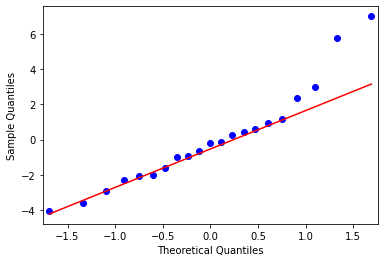

In [35]:
qq_plot=sm.qqplot(transformed_model.resid, line='q')
plt.show()

*** By comparing R-square of both models, we can say that log transformed model fits better**

### ----------------------------------------------------------------------------------------------------------------------------------------------------------